* Heart-Disease---Classifications-Machine-Learning 
--------------------------------------------------

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Data contains

age - age in years 

sex - (1 = male; 0 = female) 

cp - chest pain type 

trestbps - resting blood pressure (in mm Hg on admission to the hospital) 

chol - serum cholestoral in mg/dl 

fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 

restecg - resting electrocardiographic results 

thalach - maximum heart rate achieved 

exang - exercise induced angina (1 = yes; 0 = no) 

oldpeak - ST depression induced by exercise relative to rest 
slope - the slope of the peak exercise ST segment 

ca - number of major vessels (0-3) colored by flourosopy 

thal - 3 = normal; 6 = fixed defect; 7 = reversable defect 

target - have disease or not (1=yes, 0=no)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

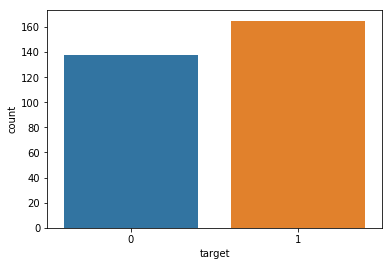

In [7]:
sns.countplot(x='target',data=df)
plt.show()

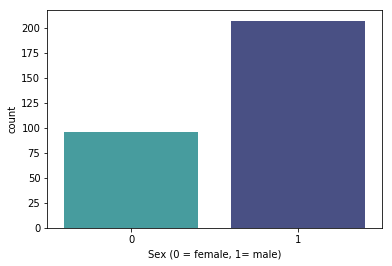

In [8]:
sns.countplot(x='sex', data=df, palette="mako_r")
plt.xlabel("Sex (0 = female, 1= male)")

plt.show()

Text(0.5,0,'Sex (0 = female, 1= male)')

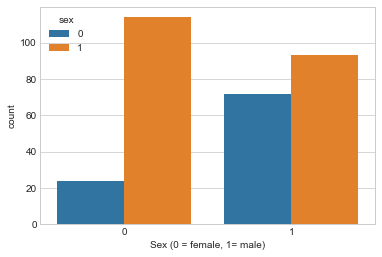

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='target',hue='sex',data=df)
plt.xlabel("Sex (0 = female, 1= male)")

#sex - (1 = male; 0 = female)

Text(0.5,0,'Age')

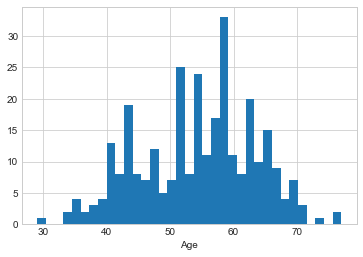

In [10]:
sns.set_style('whitegrid')

df['age'].hist(bins=35)

plt.xlabel('Age')

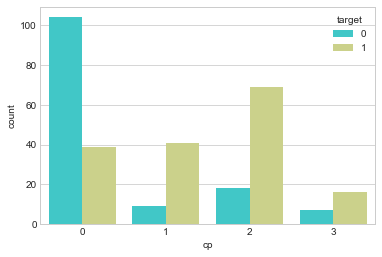

In [11]:
sns.set_style('whitegrid')
sns.countplot(x='cp',hue='target',data=df,palette='rainbow')

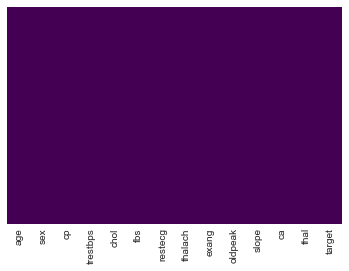

In [12]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [13]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [14]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [15]:

sex1 = pd.get_dummies(df['sex'],drop_first=True)
cp1 = pd.get_dummies(df['cp'],drop_first=True)
fbs1 = pd.get_dummies(df['fbs'],drop_first=True)
restecg1 = pd.get_dummies(df['restecg'],drop_first=True)
exang1 = pd.get_dummies(df['exang'],drop_first=True)
slope1 = pd.get_dummies(df['slope'],drop_first=True)
ca1 = pd.get_dummies(df['ca'],drop_first=True)
thal1 = pd.get_dummies(df['thal'],drop_first=True)

In [16]:
df.drop(['sex', 'cp', 'fbs', 'restecg','exang', 'slope', 'ca', 'thal'],axis=1,inplace=True)

In [17]:
df = pd.concat([df,sex1,cp1,fbs1,restecg1,exang1,slope1,cp1,thal1],axis=1)


In [18]:
df.head()

,age,trestbps,chol,thalach,oldpeak,target,1,1,2,3,...,2,1,1,2,1,2,3,1,2,3
0,63,145,233,150,2.3,1,1,0,0,1,...,0,0,0,0,0,0,1,1,0,0
1,37,130,250,187,3.5,1,1,0,1,0,...,0,0,0,0,0,1,0,0,1,0
2,41,130,204,172,1.4,1,0,1,0,0,...,0,0,0,1,1,0,0,0,1,0
3,56,120,236,178,0.8,1,1,1,0,0,...,0,0,0,1,1,0,0,0,1,0
4,57,120,354,163,0.6,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [19]:
df.columns

Index([     'age', 'trestbps',     'chol',  'thalach',  'oldpeak',   'target',
                1,          1,          2,          3,          1,          1,
                2,          1,          1,          2,          1,          2,
                3,          1,          2,          3],
      dtype='object')

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('target',axis=1), 
                                                    df['target'], test_size=0.33, 
                                                    random_state=120)

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
lr = LogisticRegression()

In [24]:
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [25]:
predictions = lr.predict(X_test)

In [26]:
predictions

array([0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1], dtype=int64)

In [27]:
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix

In [28]:
print(classification_report(y_test,predictions))
print('Accuracy score:', accuracy_score(y_test,predictions))
print('\n confusion_matrix:', confusion_matrix(y_test,predictions))

             precision    recall  f1-score   support

          0       0.83      0.83      0.83        42
          1       0.88      0.88      0.88        58

avg / total       0.86      0.86      0.86       100

Accuracy score: 0.86

 confusion_matrix: [[35  7]
 [ 7 51]]


In [29]:

from sklearn.svm import SVC
SVM = SVC()
SVM.fit(X_test, y_test)
pred = SVM.predict(X_test)
print(classification_report(y_test,pred))

print(confusion_matrix(y_test,pred))

print('Accuracy score:', accuracy_score(y_test,pred)) #overfitting 



             precision    recall  f1-score   support

          0       1.00      1.00      1.00        42
          1       1.00      1.00      1.00        58

avg / total       1.00      1.00      1.00       100

[[42  0]
 [ 0 58]]
Accuracy score: 1.0


In [30]:
print(classification_report(y_test,predictions))

print(confusion_matrix(y_test,predictions))

print('Accuracy score:', accuracy_score(y_test,predictions))

             precision    recall  f1-score   support

          0       0.83      0.83      0.83        42
          1       0.88      0.88      0.88        58

avg / total       0.86      0.86      0.86       100

[[35  7]
 [ 7 51]]
Accuracy score: 0.86


In [31]:
from sklearn.grid_search import GridSearchCV

C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\ajink\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [32]:
param_grid = {'C': [1,10,100,1000], 'max_iter': [100,105,110,120]}

In [33]:
grid = GridSearchCV(lr,param_grid,verbose=3)

In [34]:
grid.fit(X_train,y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=1, max_iter=100 ...............................................
[CV] ...................... C=1, max_iter=100, score=0.735294 -   0.0s
[CV] C=1, max_iter=100 ...............................................
[CV] ...................... C=1, max_iter=100, score=0.764706 -   0.0s
[CV] C=1, max_iter=100 ...............................................
[CV] ...................... C=1, max_iter=100, score=0.805970 -   0.0s
[CV] C=1, max_iter=105 ...............................................
[CV] ...................... C=1, max_iter=105, score=0.735294 -   0.0s
[CV] C=1, max_iter=105 ...............................................
[CV] ...................... C=1, max_iter=105, score=0.764706 -   0.0s
[CV] C=1, max_iter=105 ...............................................
[CV] ...................... C=1, max_iter=105, score=0.805970 -   0.0s
[CV] C=1, max_iter=110 ...............................................
[CV] ...........

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] ................... C=1000, max_iter=100, score=0.820896 -   0.0s
[CV] C=1000, max_iter=105 ............................................
[CV] ................... C=1000, max_iter=105, score=0.735294 -   0.0s
[CV] C=1000, max_iter=105 ............................................
[CV] ................... C=1000, max_iter=105, score=0.779412 -   0.0s
[CV] C=1000, max_iter=105 ............................................
[CV] ................... C=1000, max_iter=105, score=0.820896 -   0.0s
[CV] C=1000, max_iter=110 ............................................
[CV] ................... C=1000, max_iter=110, score=0.735294 -   0.0s
[CV] C=1000, max_iter=110 ............................................
[CV] ................... C=1000, max_iter=110, score=0.779412 -   0.0s
[CV] C=1000, max_iter=110 ............................................
[CV] ................... C=1000, max_iter=110, score=0.820896 -   0.0s
[CV] C=1000, max_iter=120 ............................................
[CV] 

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.1s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [1, 10, 100, 1000], 'max_iter': [100, 105, 110, 120]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=3)

In [35]:
grid.best_params_

{'C': 10, 'max_iter': 100}

In [36]:
grid.best_estimator_

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [37]:
grid_predictions = grid.predict(X_test)

In [38]:
print(confusion_matrix(y_test,grid_predictions))

[[35  7]
 [ 8 50]]


In [39]:
print(classification_report(y_test,grid_predictions))

             precision    recall  f1-score   support

          0       0.81      0.83      0.82        42
          1       0.88      0.86      0.87        58

avg / total       0.85      0.85      0.85       100

